In [17]:
import matplotlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.colors as mcolors
%matplotlib inline


In [18]:
df = pd.read_csv('AppleStore.csv')
df.head()

,Unnamed: 0,track_name,size_bytes,currency,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,prime_genre,sup_devices.num,lang.num
0,1,PAC-MAN Premium,100788224,USD,3.99,21292,26,4.0,4.5,6.3.5,Games,38,10
1,2,Evernote - stay organized,158578688,USD,0.00,161065,26,4.0,3.5,8.2.2,Productivity,37,23
2,3,"WeatherBug - Local Weather, Radar, Maps, Alerts",100524032,USD,0.00,188583,2822,3.5,4.5,5.0.0,Weather,37,3
3,4,"eBay: Best App to Buy, Sell, Save! Online Shop...",128512000,USD,0.00,262241,649,4.0,4.5,5.10.0,Shopping,37,9
4,5,Bible,92774400,USD,0.00,985920,5320,4.5,5.0,7.5.1,Reference,37,45


In [19]:
df.shape


(7197, 13)

### Start checking out what is the popular category

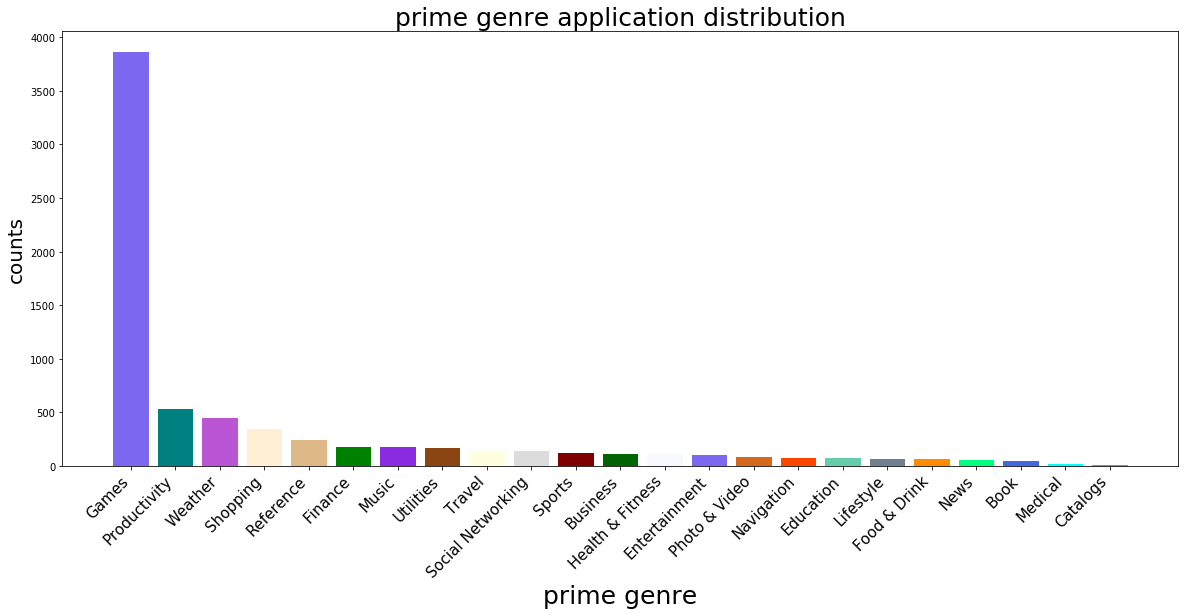

In [20]:
#classic plot method
plt.figure(figsize=(20, 8))
plt.bar(df['prime_genre'].unique(),df['prime_genre'].value_counts(),align='center',color=np.random.choice(list(mcolors.CSS4_COLORS.keys()),24) )
plt.title('prime genre application distribution',fontsize=25)
plt.ylabel('counts',fontsize=20)
plt.xlabel('prime genre',fontsize=25)
plt.xticks(rotation=45, ha="right",fontsize=15)
plt.show()       

# You can see that the games category has a big gap over the other categories. Let’s explore the category with general and broad info while separating free games and paid games

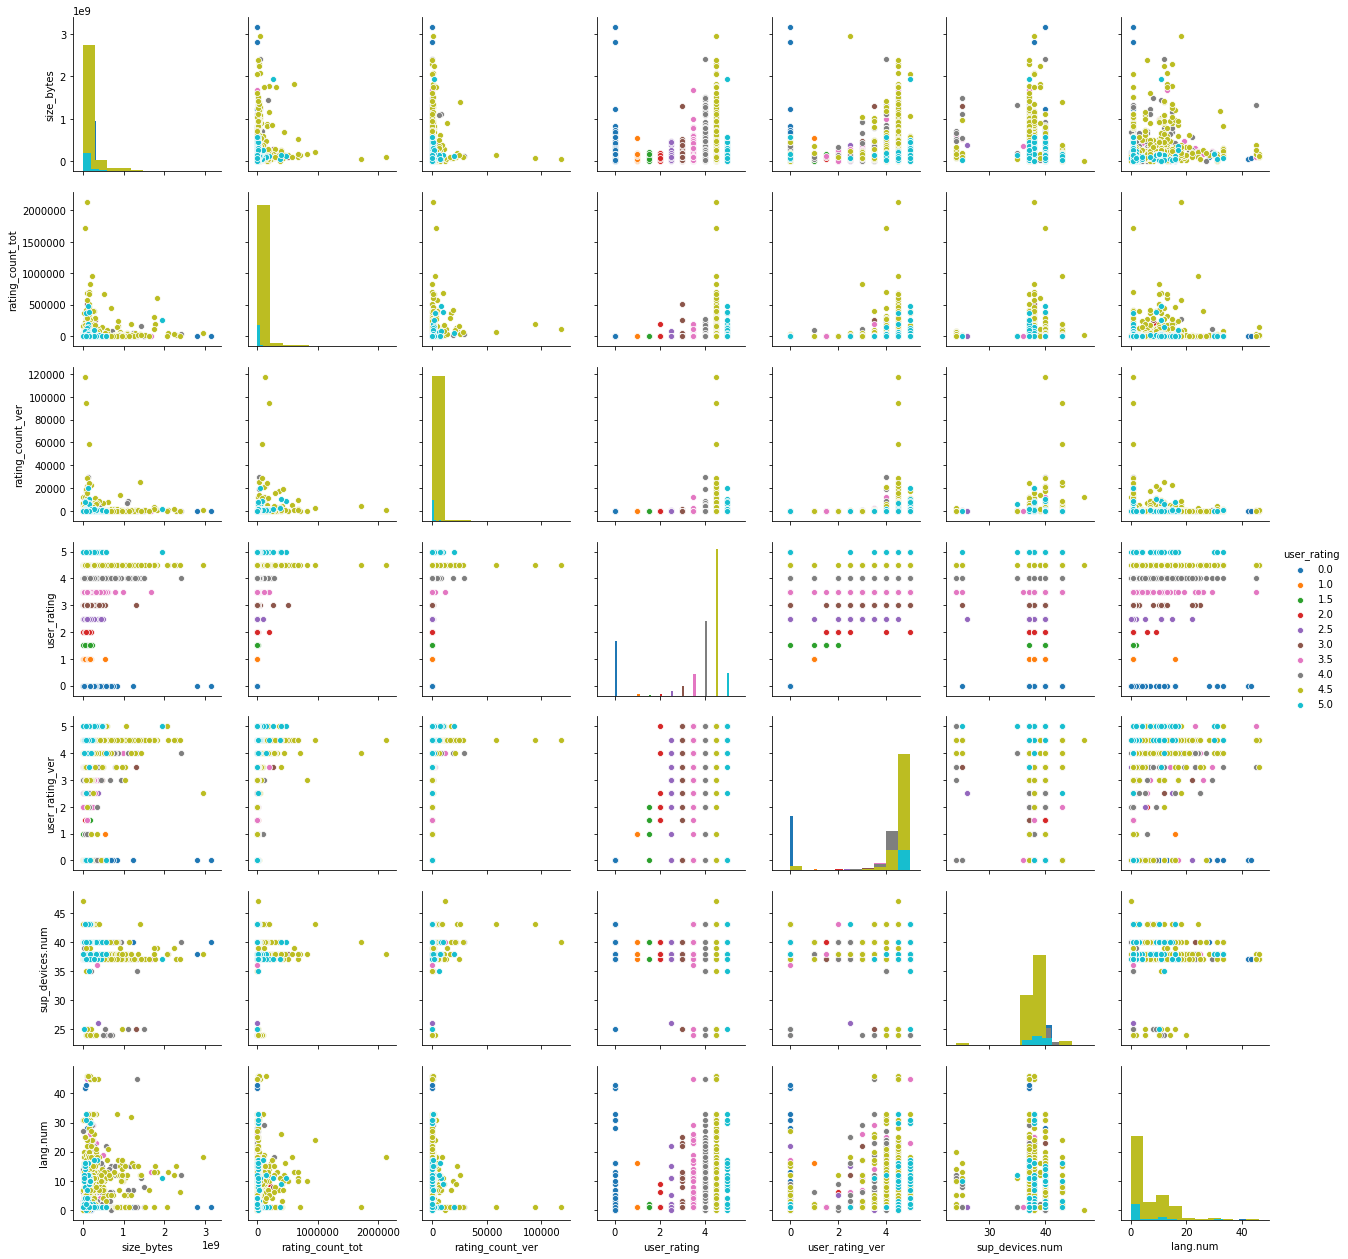

In [21]:
free_games=df[(df['prime_genre']=='Games') &( df['price']==0.0)].drop(['price','Unnamed: 0','ver'],axis =1)
sns.pairplot(free_games,hue='user_rating',diag_kind='hist')

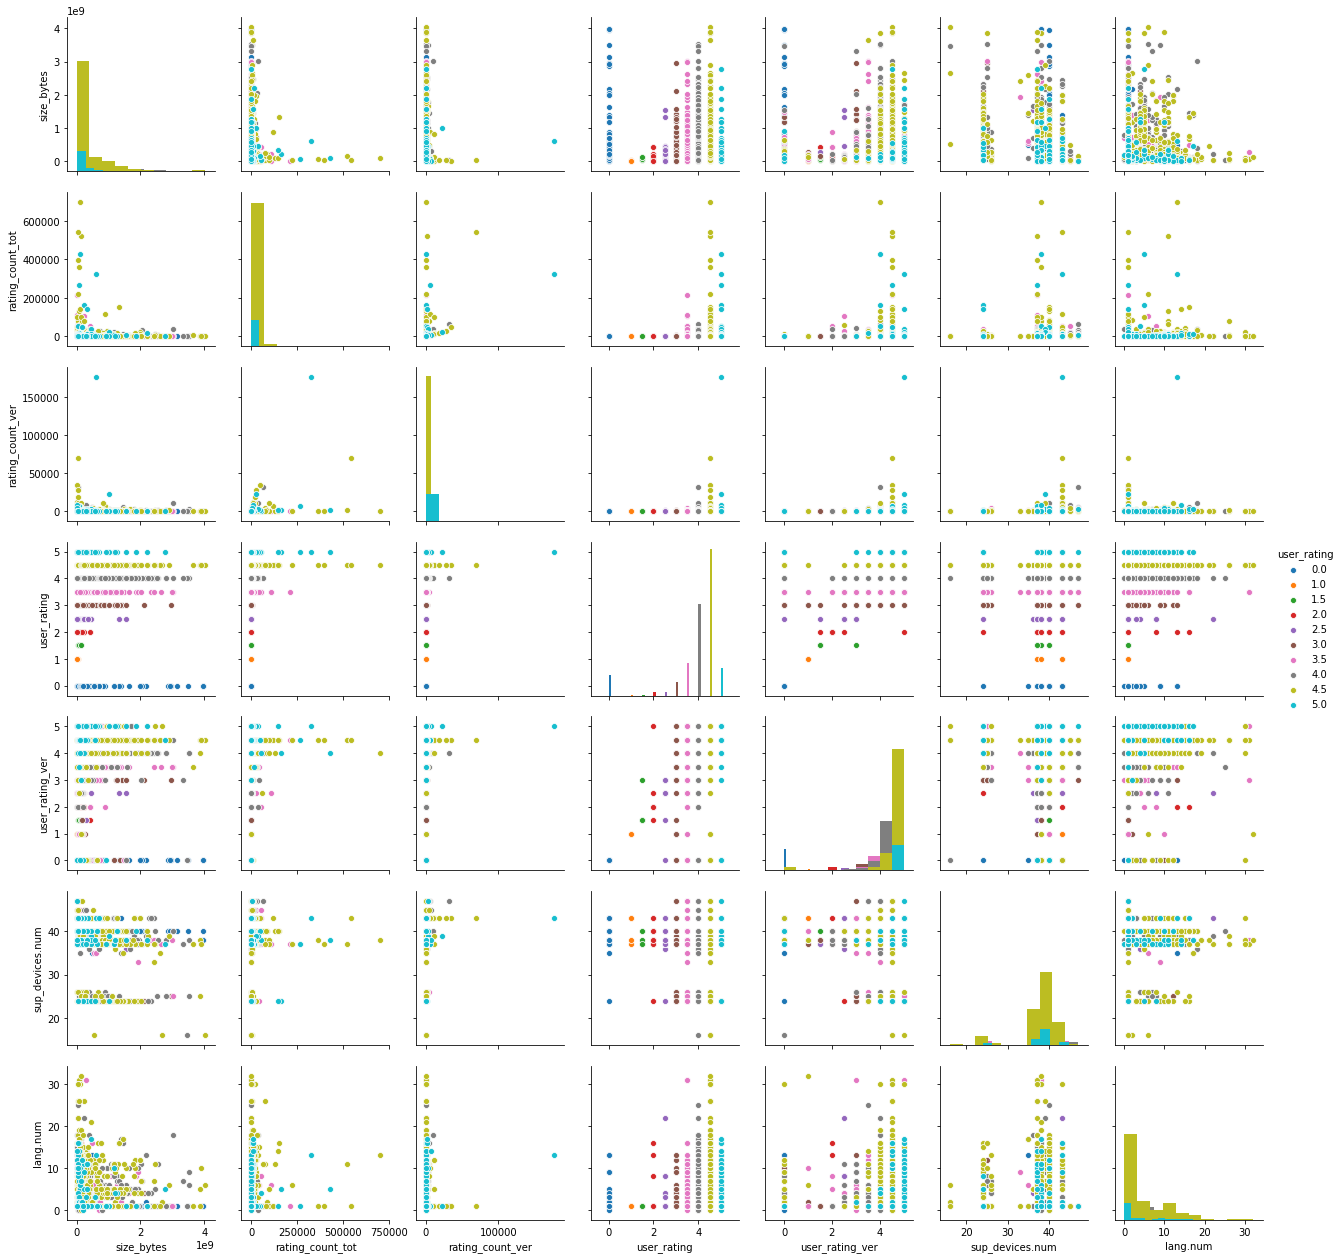

In [22]:
paid_games=df[(df['prime_genre']=='Games') &( df['price']!=0.0)].drop(['price','Unnamed: 0','ver'],axis =1)
sns.pairplot(paid_games,hue='user_rating',diag_kind='hist')


# We'll continue with the Ratings Distribution for the data

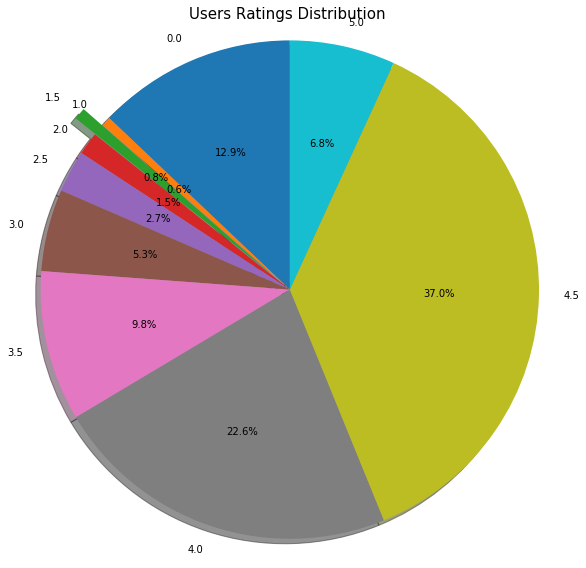

In [23]:
# Object-Oriented Method
labels =df['user_rating'].sort_values().unique()
sizes = []
for label in labels:
    sizes.append(df[df['user_rating']==label].shape[0])
 
fig1, ax1 = plt.subplots(figsize=(8, 8))
explode = (0, 0, 0.1, 0,0,0,0,0,0,0)
ax1.pie(sizes, labels=labels,  explode=explode,autopct='%1.1f%%',shadow=True, startangle=90)
ax1.axis('equal') 
ax1.set_title('Users Ratings Distribution ',fontsize=15)
fig1.tight_layout()
    


### You can see that the most common rating is 4.5 with 37%. Another interesting statistic is the 0.0 rating with 12%. Let’s do a little research on the above ratings:
   * let's start with the 0.0 rating by checking how many ranks gave 0

Text(0.5, 1.0, 'count of rating ')

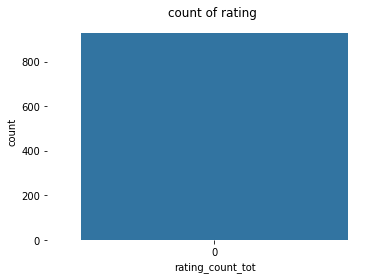

In [24]:
rat_0=df[df['user_rating']==0]

sns.countplot(x="rating_count_tot",data=rat_0)
sns.despine(left=True, bottom=True)
plt.title('count of rating ')


**You can see that there will be no ratings for the 0 rating. Probably the data was created when the application was launched before it was rated, or the application did not appeal to the public that tends to rank.**

* We will continue with tests for the 4.5 rating - the most common rating

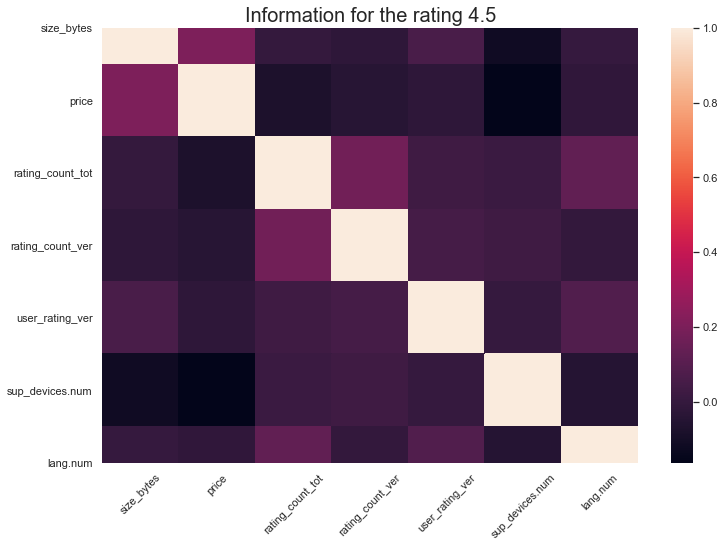

In [91]:
rat_45=df[df['user_rating']==4.5]
corr= rat_45.corr().drop(['user_rating','Unnamed: 0']).drop(['user_rating','Unnamed: 0'],axis=1)
plt.gcf().set_size_inches(12, 8)
plt.title("Information for the rating 4.5", fontsize=20)
plt.xticks(rotation=45)
sns.heatmap(corr)

We will continue with the distribution of rankings with the comparison of the overall rating and the rating for the latest version

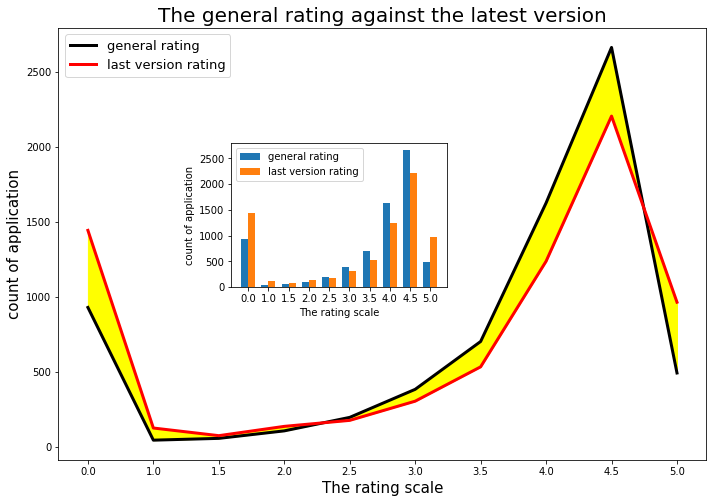

In [26]:

labels =df['user_rating'].sort_values().unique()
user_rating = df['user_rating'].value_counts().sort_index()
user_rating_ver = df['user_rating_ver'].value_counts().sort_index()

x = np.arange(len(labels)) 
width = 0.35 
fig2 = plt.figure()

ax= fig2.add_axes([0, 0, 1.5,1.5 ])
ax.plot(x, user_rating, label='general rating',color='black', lw=3)
ax.plot(x, user_rating_ver, label='last version rating',color='red',lw=3)

ax.set_ylabel('count of application',fontsize=15)
ax.set_xlabel('The rating scale',fontsize=15)
ax.set_title('The general rating against the latest version',fontsize=20)
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend(fontsize=13)

plt.fill_between(x, user_rating, user_rating_ver,color='yellow')

ax1= fig2.add_axes([0.4, 0.6, 0.5, 0.5])
ax1.bar(x - width/2, user_rating, width, label='general rating')
ax1.bar(x + width/2, user_rating_ver, width, label='last version rating')

ax1.set_ylabel('count of application',fontsize=10)
ax1.set_xlabel('The rating scale',fontsize=10)
#ax1.set_title('The general rating against the latest version',fontsize=15)
ax1.set_xticks(x)
ax1.set_xticklabels(labels)
ax1.legend()

You can see that the overall rating was better than the rating for the latest version. The overall rating below the average is lower than the latest version and for the above average this is replaced with a small change for the 5 rating.

let's continue:
* We will extract from the data the 15 top rated applications

Text(0.5, 1.0, 'The 15th most rated applications')

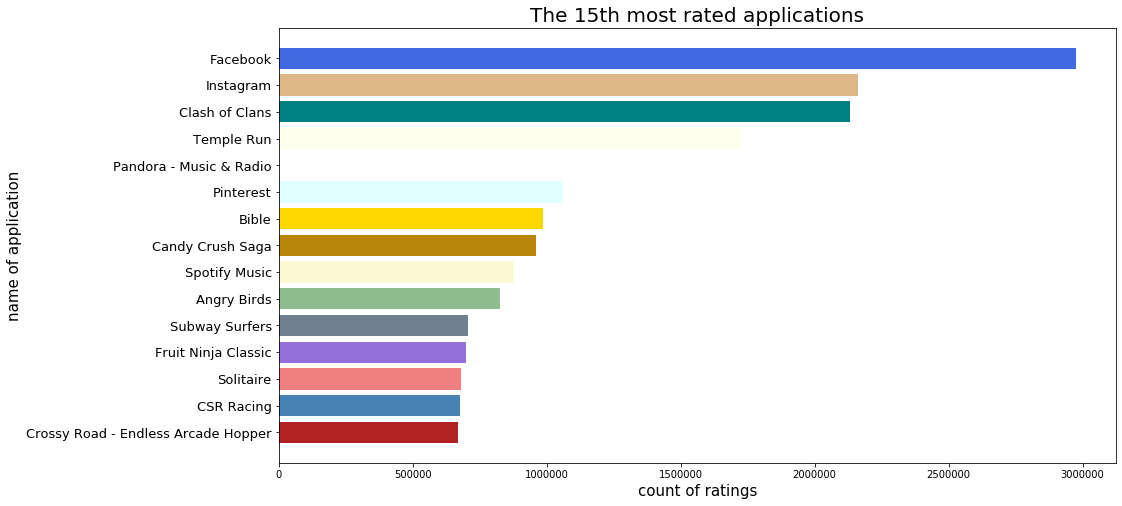

In [27]:
most_rat15= df.iloc[df['rating_count_tot'].sort_values()[-15:].index]
x=most_rat15['rating_count_tot']
y=most_rat15['track_name']

fig, ax = plt.subplots(figsize=(15,8))

ax.barh(y,x,align='center',color=np.random.choice(list(mcolors.CSS4_COLORS.keys()),15) )

ax.set_ylabel('name of application',fontsize=15)
ax.set_yticklabels(fontsize=13, labels=y)
ax.set_xlabel('count of ratings',fontsize=15)
ax.set_title('The 15th most rated applications',fontsize=20)


You can see the two popular social networking apps with a fair amount of ratings, plus the familiar games and of course the best-selling book in the world.

### We will continue with the data extraction of the 20 highest rated apps (5 \ 5) with reference of course to the number of ratings

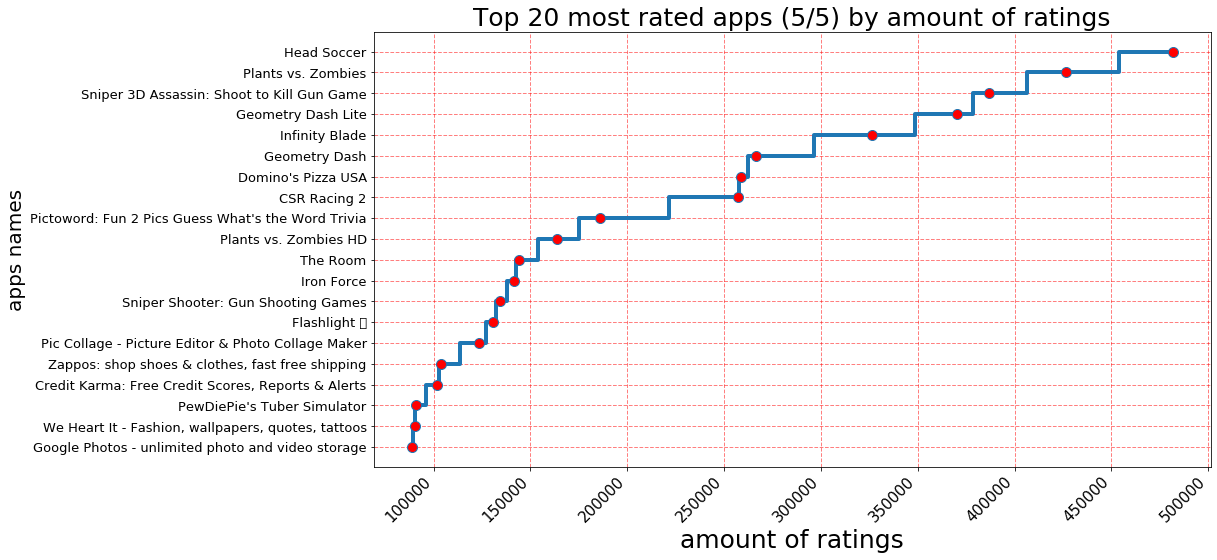

In [28]:
top20_rat= df.sort_values(by=['user_rating', 'rating_count_tot'])[-20:]

plt.figure(figsize=(15, 8))
plt.step(top20_rat['rating_count_tot'],top20_rat['track_name'],where='mid', label='mid',lw=4,marker='o',markersize=10
        ,markerfacecolor="red",)

plt.title('Top 20 most rated apps (5/5) by amount of ratings',fontsize=25)
plt.ylabel('apps names',fontsize=20)
plt.xlabel('amount of ratings',fontsize=25)
plt.xticks(rotation=45, ha="right",fontsize=15)
plt.yticks(fontsize=13)
plt.grid(color='r', linestyle='--', linewidth=1, alpha=0.5)
plt.show()

**You can see that most applications are not so well known except for google photo and domino's pizza.
In addition, despite the high rating, the number of ratings is not high. Below we will see if there is a relationship between the number of raters and the ranking result**

# Ratio: Rating - Supportive Devices - Language Translation

We will try to study the relationship between rating and:
 * The amount of devices that support the application.
 * The amount of languages for which the application was translated.

**When the question is: Is it better to support as many devices as possible or translate the application into as many languages as possible?** 

Text(0.5, 0, 'languages')

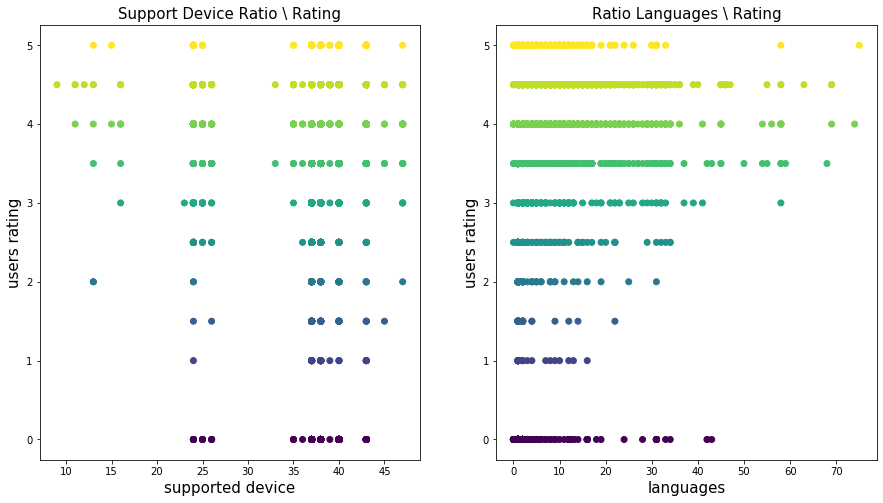

In [29]:
fig, axes = plt.subplots(1, 2, figsize=(15,8))

x1 = df['sup_devices.num']
x2 = df['lang.num']
y = df['user_rating']

axes[0].scatter(x1,y,c=y)
axes[0].set_title('Support Device Ratio \ Rating',fontsize=15)
axes[0].set_xlabel('supported device',fontsize=15)
axes[0].set_ylabel('users rating',fontsize=15)

axes[1].scatter(x2,y,c=y)
axes[1].set_title('Ratio Languages \ Rating',fontsize=15)
axes[1].set_ylabel('users rating',fontsize=15)
axes[1].set_xlabel('languages',fontsize=15)


**From what is represented in the two graphs, not much can be learned about the desired ratio, ie it is not possible to determine if it is better to support as many devices or multi-language translation.**

It may be possible to determine and see more clearly by combining these three variables.

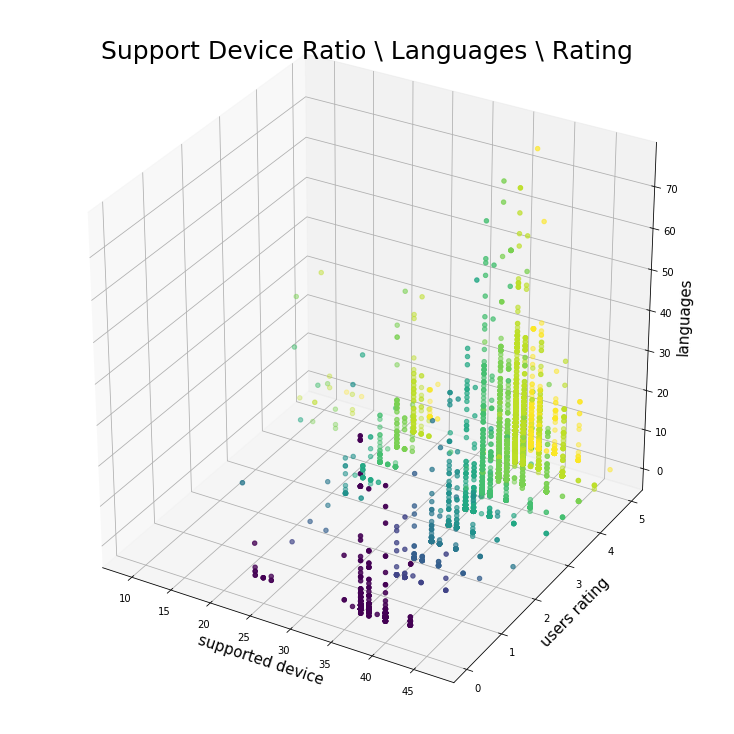

In [30]:
from mpl_toolkits.mplot3d import Axes3D 
fig = plt.figure(figsize=(10,10))

x = df['sup_devices.num']
y = df['user_rating']
z = df['lang.num']

ax = Axes3D(fig)
ax.scatter(x,y,z, c=y, marker='o')
ax.set_xlabel('supported device',fontsize=15)
ax.set_ylabel('users rating',fontsize=15)
ax.set_zlabel('languages',fontsize=15)
ax.set_title('Support Device Ratio \ Languages \ Rating',fontsize=25)
plt.show()

**In summary, a high concentration of samples can be seen for the applications that supported 30-40 devices, with a high rating, with no major impact on the number of languages.**

# Ratio: Price - Rating

We will look at the relationship between price and rating while looking at the distribution of the samples for each price observed in the data.

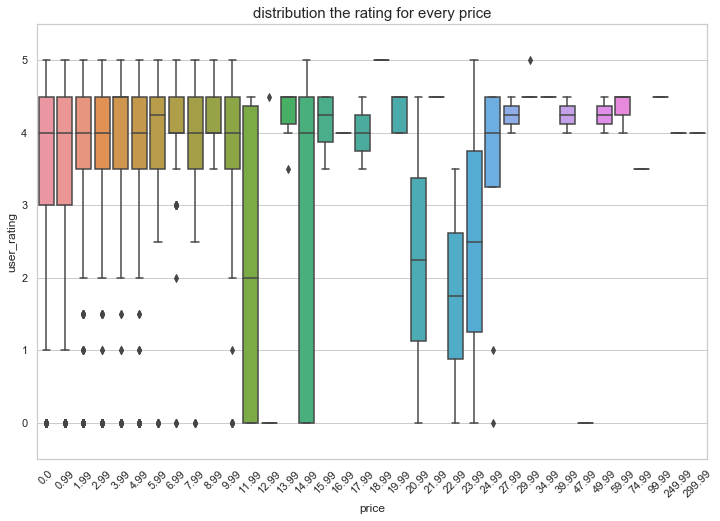

In [70]:
sns.boxplot(x='price', y="user_rating", data=df).set_title("distribution the rating for every price",fontsize=15)
plt.gcf().set_size_inches(12, 8)
plt.ylim(-0.5,5.5)
plt.xticks(rotation=45)

plt.show()

**You can see that the average (median) rating for most prices is 4.0 (as you can see in the pie graph) while for the high prices** **($ 12 and up) the spread is very wide for some and very narrow for some.**

# Ratio: number of raters and the rating results

As promised above we will see if there is a relationship between the number of raters and the ranking result.

(0, 600000)

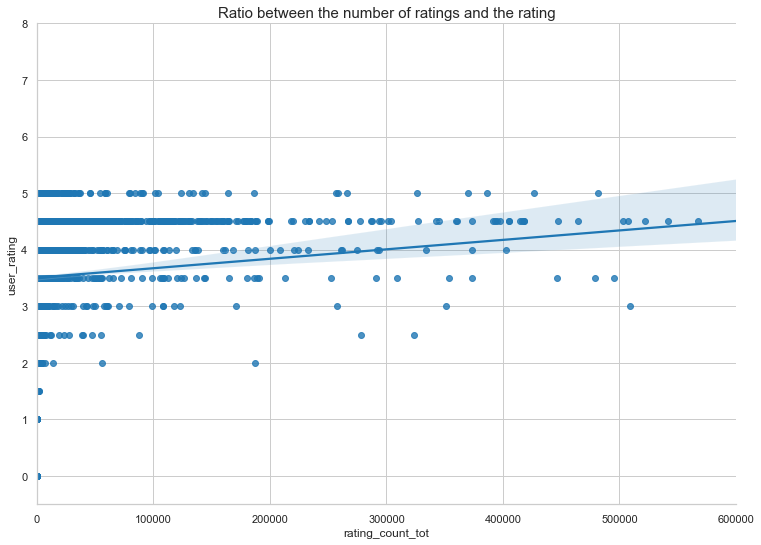

In [86]:
sns.lmplot(x = 'rating_count_tot',y = 'user_rating',data = df)
plt.title("Ratio between the number of ratings and the rating",fontsize=15)
plt.ylim(-0.5,8)
plt.gcf().set_size_inches(12, 8)
plt.xlim(0,600000)

**Although we can see from the samples that even low-ranking applications received a high rating, the regression line increases as the number of raters increases. You can say that a large number of raters balance the rating in favor of the average as seen in the pie graph.**